In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
Fdc = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Decision Tree\Fraud_check.csv')
Fdc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [159]:
Fdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [160]:
Fdc.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [161]:
Column_names = ['Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban']

In [162]:
Fdc['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [163]:
Fdc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


Text(0, 0.5, 'Population')

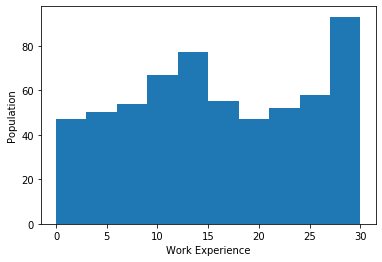

In [164]:
plt.hist(Fdc['Work.Experience'])
plt.xlabel('Work Experience')
plt.ylabel('Population')

In [165]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [166]:
# Formed a for loop to convert the Categorical data to numerical data

for column_name in Fdc.columns:
    if Fdc[column_name].dtype == object:
        Fdc[column_name] = le.fit_transform(Fdc[column_name])
    else:
            pass
    

In [167]:
Fdc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [168]:
Fdc.loc[Fdc['Taxable.Income'] <= 30000,'New'] = 'Risky'
Fdc.loc[Fdc['Taxable.Income'] > 30000, 'New'] = 'Good'            

In [175]:
#Fdc.drop(labels='Taxable.Income',axis=1,inplace=True)
Fdc

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,New
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [176]:
# Split the data into X and Y

X = Fdc.iloc[:,0:5]
X

Y = Fdc.iloc[:,5]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: New, Length: 600, dtype: object

In [177]:
# Split the data into train and test

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [178]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
Classifier = DecisionTreeClassifier(criterion='gini')

In [181]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [182]:
Xpred = Classifier.predict(X_test)

In [183]:
conf_mat = confusion_matrix(Xpred,y_test)
conf_mat

array([[96, 26],
       [48, 10]], dtype=int64)

In [184]:
acc = accuracy_score(Xpred,y_test)*100
acc

58.88888888888889

In [187]:
# Tuning the parameters
Classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=50)
Classifier.fit(X_train,y_train)
Xpred = Classifier.predict(X_test)


In [188]:
conf_mat = confusion_matrix(Xpred,y_test)
conf_mat

array([[138,  34],
       [  6,   2]], dtype=int64)

In [189]:
acc = accuracy_score(Xpred,y_test)*100
acc

77.77777777777779

In [193]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(Classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False,feature_names = Column_names ,class_names= ['Risky','Good'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Image(graph.create_png())